# Deep Learning on Apache Spark

In [2]:
# vector and matrix multiplocation recap
import numpy as np
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([[1,2,3], [1,2,3], [1,2,3]])

a.dot(b), a.dot(c)

(14, array([ 6, 12, 18]))

In [8]:
# Deep Learning
dp1 = {'partno': 100, 'maxtemp': 35, 'mintemp': 35, 'maxvibration': 12, 'broken': 0} #, 'asperity': 0.32}
dp2 = {'partno': 101, 'maxtemp': 46, 'mintemp': 35, 'maxvibration': 21, 'broken': 0} # , 'asperity': 0.34}
dp3 = {'partno': 130, 'maxtemp': 56, 'mintemp': 46, 'maxvibration': 3412, 'broken': 1} # 'asperity': 12.42}
dp4 = {'partno': 131, 'maxtemp': 58, 'mintemp': 48, 'maxvibration': 3542, 'broken': 1} # 'asperity': 13.43}


In [6]:
# hard coded wieghts for linear regression
w1 = 0.3
w2 = 0
w3 = 0
w4 = 13/3532

def mlpredict(dp):
    return w1+w2*dp['maxtemp']+w3*dp['mintemp']+w4*dp['maxvibration']

mlpredict(dp1)

0.34416761041902605

In [10]:
# code for classification model
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

def mlpredict(dp):
    return sigmoid(w1+w2*dp['maxtemp']+w3*dp['mintemp']+w4*dp['maxvibration'])
mlpredict(dp3)

0.999997395647568

In [ ]:
## Convolutional Neural Network
# sliding over a function using a convolutional method. Step size is called stride
# convolution calculations perform dot multiplication on the sliding 
# max pooling is used to reduce dimensionality

## Recurrent Neural Network - time series and IOT data
# LSTM- long short term memory network

## Autoencoders - unsupervised dimensionality reduction
# they have an input layer with the original data. It tries to map x input to itself as output. It has to 
# pass through an intermediate layer with fewer neurons, so that it would learn by itself

## Method
a3 = y and a1 = X (one hidden layer only)
cost function J = sum*1/2 * (y-yhat)**2
yhat = a3 = f(z3) = f(a2 dot(W2)) = f(f(z2) dot(W2)) = f((X dot(W1)) dot(W2))
then we take the derivative (gradient) of the cost function to optimize it.



In [12]:
## 
# random initialization of weights
# compute cost function and derivative to move toward the direction to minimize the cost
# gradient descent uses the training data to estimate the best weights for the neural network
# there are several methods for optimized gradient descent, trying to reach the global minima.
# For RNNs, the best optimizer normally is RMSprop. For other NNs, normally it is ADAM. 
# Adadelta might be a good option as well

# How to choose the correct activation function
- tanh: -1 to 1
- softmax: multiclassification
- sigmoid: binary classification
- RELU: max(0,z) - used more often
- Leaky RELU: add a noise to avoid having 0 as the minimum and killing neurons alltogether
- 

# Bias x Variance tradeoff
prevent overfitting:
- get more data is one option, sometimes
- regularization: penalize weights, by setting lambda
- early stopping: stop training when loss for validation set starts increasing again
- drop out layer



## Tensorflow

In [60]:
# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

import numpy as np
import seaborn as sns

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt

In [61]:
# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


1


(<matplotlib.image.AxesImage at 0x7fba26230dc0>, None)

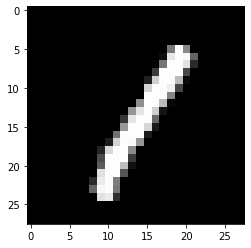

In [62]:
a = np.random.randint(0,27)
plt.imshow(x_train[a]), print(y_train[a])

## Tensorflow Keras

In [101]:
# deep learning framework written in python

## steps:
# import packages
from tf.keras.datasets import mnist
from tf.keras.models import Sequential
from tf.keras.layers import Dense
from tf.keras.utils import to_categorical

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# one hot encode y_train and y_test
y_train_cat = to_categorical(y_train, num_classes=10, dtype="float32")
y_test_cat = to_categorical(y_test, num_classes=10, dtype="float32")

# Instantiate the model
model = Sequential()
# add hidden layers
model.add(Dense(32, activation = "relu", input_shape = (image_vector_size,)))   # or (784,)  normally, use the X_train[1:].shape for it
model.add(Dense(16, activation = "relu")) # The first value represent the UNITS, or number of output neurons for this specific layer  
# add output layer
model.add(Dense(10, activation = "softmax")) # 10 output layers, representing our classification task in this case

# compile
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

# train
history = model.fit(x_train, y_train_cat, batch_size = 128,
                   epochs = 10, validation_split=0.2)



Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 1.0806 - accuracy: 0.7154 - val_loss: 0.6043 - val_accuracy: 0.8537
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.5383 - accuracy: 0.8632 - val_loss: 0.4592 - val_accuracy: 0.8805
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4303 - accuracy: 0.8817 - val_loss: 0.3674 - val_accuracy: 0.8953
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3913 - accuracy: 0.8884 - val_loss: 0.3499 - val_accuracy: 0.9020
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3635 - accuracy: 0.8966 - val_loss: 0.3406 - val_accuracy: 0.9022
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3447 - accuracy: 0.8977 - val_loss: 0.3220 - val_accuracy: 0.9056
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.9014 - val_loss: 0.3157 - val_accuracy: 0.9048
Epoch 

In [108]:
history.history

{'loss': [1.0805941820144653,
  0.5382927656173706,
  0.43027615547180176,
  0.39130866527557373,
  0.3634972870349884,
  0.3447275459766388,
  0.33139535784721375,
  0.316595196723938,
  0.3124292194843292,
  0.3087620139122009],
 'accuracy': [0.7153541445732117,
  0.8631666898727417,
  0.8816666603088379,
  0.8884166479110718,
  0.8965833187103271,
  0.8977083563804626,
  0.901354193687439,
  0.9038125276565552,
  0.9066666960716248,
  0.9071666598320007],
 'val_loss': [0.6042738556861877,
  0.4591716229915619,
  0.36739563941955566,
  0.3499293923377991,
  0.3405986726284027,
  0.32204338908195496,
  0.3156585693359375,
  0.3057267367839813,
  0.31018441915512085,
  0.287052720785141],
 'val_accuracy': [0.8536666631698608,
  0.8805000185966492,
  0.8953333497047424,
  0.9020000100135803,
  0.9022499918937683,
  0.9055833220481873,
  0.9048333168029785,
  0.9097499847412109,
  0.9096666574478149,
  0.9140833616256714]}

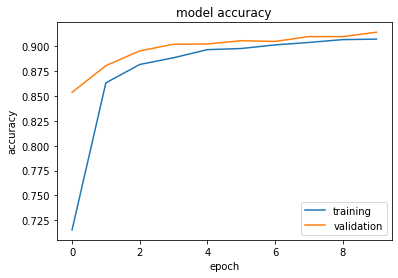

Test loss: 0.303
Test accuracy: 0.911


In [109]:
#evaluate the model
loss, accuracy  = model.evaluate(x_test, y_test_cat, verbose=False)

# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [110]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 375}

In [136]:
# visualize the weights set for each layer
print(len(model.get_weights()))
print(model.get_weights()[0].shape)
print(model.get_weights()[1].shape)
print( model.get_weights()[2].shape)
print(model.get_weights()[3].shape)

4
(784, 32)
(32,)
(32, 10)
(10,)


## Recurrent Neural Network

In [156]:
# movie prediction
from tf.keras.datasets import imdb

# import packages
from tf.keras.layers import LSTM  # LSTM is the most popular at the moment
from tf.keras.models import Sequential
from tf.keras.layers import Dense, Embedding # embedding layers transforms integers into vectors of the same length or, for NLP, a vocabulary into a vector space, applied to sentences    
from tf.keras.utils import to_categorical
from tf.keras.preprocessing import sequence

# load data
max_features = 20000
max_len = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# max([len(x) for x in x_train]), min([len(x) for x in x_train])
# 2494 and 11 sequences of words

# so we need to pad them to have the same length all along, and set the max length we want to work with
x_train_pad = sequence.pad_sequences(x_train, maxlen = max_len) # by default it will pad with zeros
x_test_pad = sequence.pad_sequences(x_test, maxlen = max_len)


In [157]:
print("original max length: ", max([len(x) for x in x_train]), "and min length: ", min([len(x) for x in x_train]))
print("With max length and padded. Max: ", max([len(x) for x in x_train_pad]), "and min length: ", min([len(x) for x in x_train_pad]))


original max length:  2494 and min length:  11
With max length and padded. Max:  20 and min length:  20


In [158]:
# Instantiate model
model = Sequential()

# add layers
model.add(Embedding(max_features, 128)) # 128 output dimensions
model.add(LSTM(128, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

# compile
model.compile(loss = "binary_crossentropy",
             optimizer = "RMSprop",
             metrics = "accuracy")

# fit
history = model.fit(x_train_pad, y_train,
                   batch_size = 32, epochs = 15,
                    validation_split=0.2)


Epoch 1/15
625/625 [==============================] - 21s 32ms/step - loss: 0.5470 - accuracy: 0.7217 - val_loss: 0.4938 - val_accuracy: 0.7496
Epoch 2/15
625/625 [==============================] - 19s 30ms/step - loss: 0.4337 - accuracy: 0.7960 - val_loss: 0.4763 - val_accuracy: 0.7656
Epoch 3/15
625/625 [==============================] - 23s 37ms/step - loss: 0.3801 - accuracy: 0.8274 - val_loss: 0.5063 - val_accuracy: 0.7630
Epoch 4/15
625/625 [==============================] - 24s 39ms/step - loss: 0.3367 - accuracy: 0.8554 - val_loss: 0.4866 - val_accuracy: 0.7578
Epoch 5/15
625/625 [==============================] - 24s 38ms/step - loss: 0.3058 - accuracy: 0.8770 - val_loss: 0.5374 - val_accuracy: 0.7556
Epoch 6/15
625/625 [==============================] - 24s 39ms/step - loss: 0.2640 - accuracy: 0.8937 - val_loss: 0.5600 - val_accuracy: 0.7572
Epoch 7/15
625/625 [==============================] - 25s 39ms/step - loss: 0.2451 - accuracy: 0.9104 - val_loss: 0.6020 - val_accuracy:

In [159]:
# evaluate
model.evaluate(x_test_pad, y_test, batch_size = 32)

782/782 [==============================] - 8s 10ms/step - loss: 8.2609 - accuracy: 0.7088


[8.260937690734863, 0.7087600231170654]

In [ ]:
## saving and loading models

# hdf5 exports the full model (architecture, weights and training configuration)
# the model can be exported as json and the weights can be exported  as HDF5

from keras import models
# saving the complete model
model.save('path_to_save_location/model.h5')
# loading this model
model = models.load_model('path_to_file/model.h5')



- distribute the task of running the model in more cores \
put the architecture, compile and fit inside this stragey function:

In [ ]:
ps_strategy = tf.distribute.experimental.ParameterServerStrategy()
with ps_strategy.open():
    model = Sequential([
        #laters
    ])
    model.compile(...)
    model.fit(...)


### Anomaly detection

In [177]:
import tensorflow as tf
import numpy as np
import pandas as pd
from  sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.callbacks import Callback
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from queue import Queue
%matplotlib inline

# download data
import pandas as pd
df_healthy = pd.read_csv('result_healthy_pandas.csv', header=None)

data_healthy = pickle.load(open('watsoniotp.healthy.phase_aligned.pickle', 'rb'), encoding="latin1")
data_broken = pickle.load(open('watsoniotp.broken.phase_aligned.pickle', 'rb'), encoding="latin1")
data_healthy = data_healthy.reshape(3000,3)
data_broken = data_broken.reshape(3000,3)

data_healthy

array([[ 2.08      ,  3.37536   ,  3.97083266],
       [ 2.1836288 ,  3.76812337,  3.95194702],
       [ 2.31038837,  4.18246112,  3.9449437 ],
       ...,
       [ 4.67227426,  8.55622075, 11.7405177 ],
       [ 4.98298998,  9.13593768, 11.85424761],
       [ 5.31522579,  9.74939673, 12.01591895]])

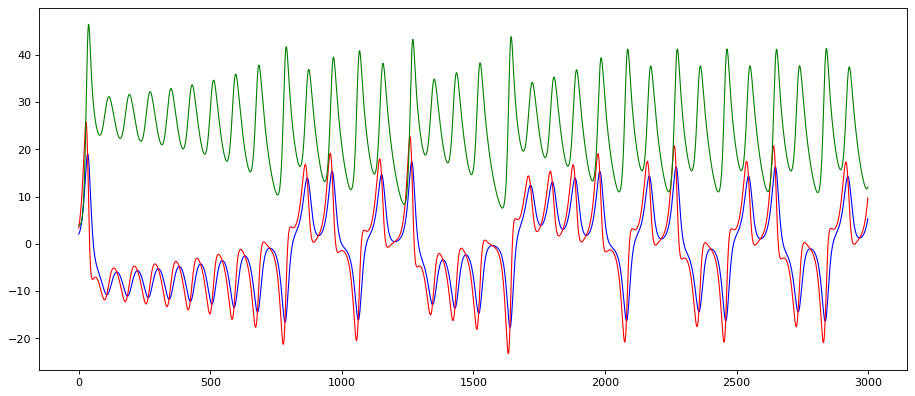

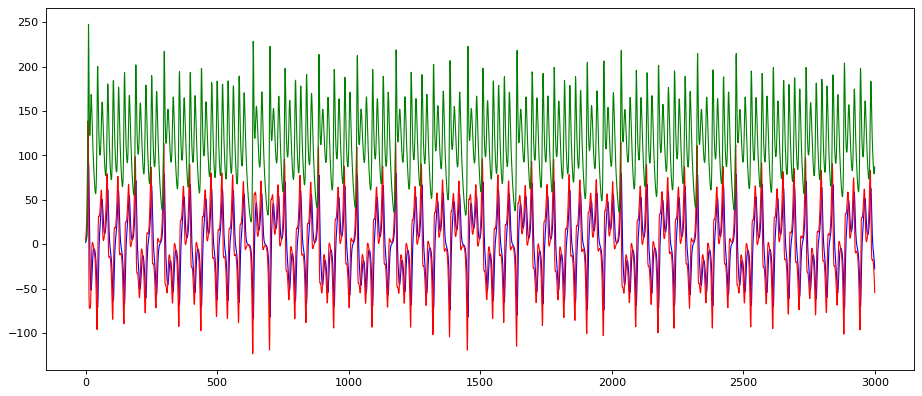

In [183]:
# Explore data

fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), data_healthy[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy[:,2], '-', color='green', animated = True, linewidth=1)

fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,size), data_broken[:,0], '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken[:,1], '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken[:,2], '-', color='green', animated = True, linewidth=1)

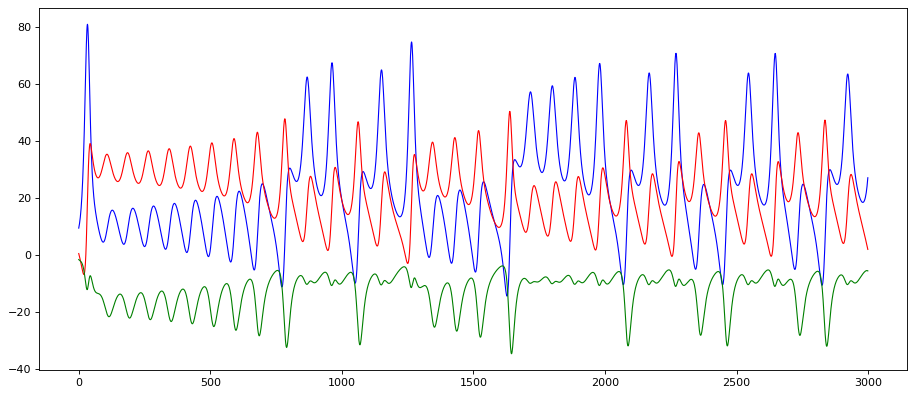

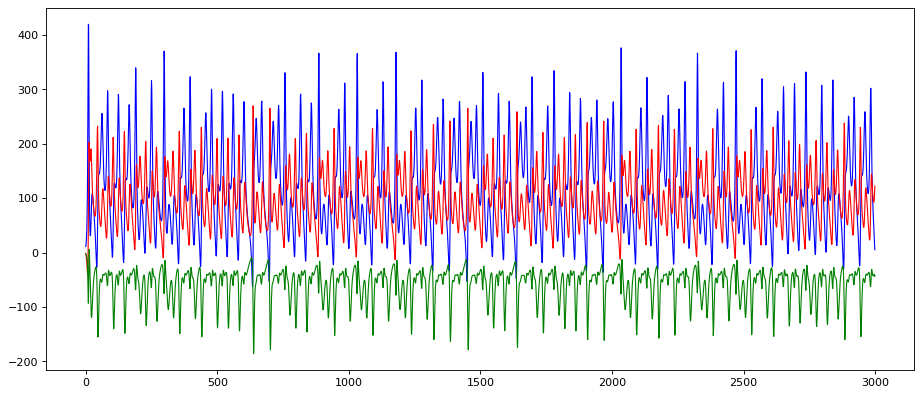

In [184]:
# more exploring

data_healthy_fft = np.fft.fft(data_healthy)
data_broken_fft = np.fft.fft(data_broken)

fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
ax.plot(range(0,size), data_healthy_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_healthy_fft[:,2].real, '-', color='green', animated = True, linewidth=1)
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
ax.plot(range(0,size), data_broken_fft[:,0].real, '-', color='blue', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,1].imag, '-', color='red', animated = True, linewidth=1)
ax.plot(range(0,size), data_broken_fft[:,2].real, '-', color='green', animated = True, linewidth=1)

In [186]:
# data preprocessing

def scaleData(data):
    # normalize features
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(data)
data_healthy_scaled = scaleData(data_healthy)
data_broken_scaled = scaleData(data_broken)

timesteps = 10 # how many past events are we using to predict the next future events
dim = 3 # how many accelerometer readings are available
samples = 3000
data_healthy_scaled_reshaped = data_healthy_scaled
data_healthy_scaled_reshaped.shape = (int(samples/timesteps),timesteps,dim)
data_healthy_scaled_reshaped.shape

losses = []

def handleLoss(loss):
        global losses
        losses+=[loss]
        print(loss)
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        handleLoss(logs.get('loss'))

In [187]:
# design network
model = Sequential()
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(10,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(3,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(10,input_shape=(timesteps,dim),return_sequences=True))
model.add(LSTM(50,input_shape=(timesteps,dim),return_sequences=True))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')

def train(data):
    model.fit(data, data, epochs=50, batch_size=72, validation_data=(data, data), verbose=1, shuffle=False,callbacks=[LossHistory()])
    # the validation_data=(data,data) is how autoencoders work
    
def score(data):
    yhat =  model.predict(data)
    return yhat

----------------
Epoch 1/50
0.38889172673225403
5/5 [==============================] - 27s 962ms/step - loss: 0.4509 - val_loss: 0.4320
Epoch 2/50
0.36223670840263367
5/5 [==============================] - 1s 143ms/step - loss: 0.4208 - val_loss: 0.3938
Epoch 3/50
0.3244900703430176
5/5 [==============================] - 1s 169ms/step - loss: 0.3776 - val_loss: 0.3382
Epoch 4/50
0.2671791911125183
5/5 [==============================] - 1s 143ms/step - loss: 0.3171 - val_loss: 0.2761
Epoch 5/50
0.20613373816013336
5/5 [==============================] - 1s 149ms/step - loss: 0.2662 - val_loss: 0.2654
Epoch 6/50
0.2208194136619568
5/5 [==============================] - 1s 160ms/step - loss: 0.2609 - val_loss: 0.2500
Epoch 7/50
0.21599456667900085
5/5 [==============================] - 1s 143ms/step - loss: 0.2434 - val_loss: 0.2339
Epoch 8/50
0.19688346982002258
5/5 [==============================] - 1s 158ms/step - loss: 0.2328 - val_loss: 0.2305
Epoch 9/50
0.19466903805732727
5/5 [=====

5/5 [==============================] - 1s 140ms/step - loss: 0.1890 - val_loss: 0.1864
Epoch 20/50
0.16914010047912598
5/5 [==============================] - 1s 146ms/step - loss: 0.1851 - val_loss: 0.1821
Epoch 21/50
0.1655433475971222
5/5 [==============================] - 1s 129ms/step - loss: 0.1806 - val_loss: 0.1769
Epoch 22/50
0.16073213517665863
5/5 [==============================] - 1s 136ms/step - loss: 0.1751 - val_loss: 0.1703
Epoch 23/50
0.1529121845960617
5/5 [==============================] - 1s 154ms/step - loss: 0.1684 - val_loss: 0.1634
Epoch 24/50
0.14452041685581207
5/5 [==============================] - 1s 142ms/step - loss: 0.1616 - val_loss: 0.1570
Epoch 25/50
0.1360837072134018
5/5 [==============================] - 1s 124ms/step - loss: 0.1557 - val_loss: 0.1525
Epoch 26/50
0.12950515747070312
5/5 [==============================] - 1s 155ms/step - loss: 0.1516 - val_loss: 0.1490
Epoch 27/50
0.12430386990308762
5/5 [==============================] - 1s 139ms/ste

Epoch 38/50
0.09190263599157333
5/5 [==============================] - 1s 146ms/step - loss: 0.1145 - val_loss: 0.1126
Epoch 39/50
0.0896860733628273
5/5 [==============================] - 1s 129ms/step - loss: 0.1121 - val_loss: 0.1105
Epoch 40/50
0.08797039091587067
5/5 [==============================] - 1s 141ms/step - loss: 0.1106 - val_loss: 0.1081
Epoch 41/50
0.08653179556131363
5/5 [==============================] - 1s 151ms/step - loss: 0.1081 - val_loss: 0.1059
Epoch 42/50
0.08407797664403915
5/5 [==============================] - 1s 133ms/step - loss: 0.1049 - val_loss: 0.1042
Epoch 43/50
0.08346927911043167
5/5 [==============================] - 1s 148ms/step - loss: 0.1038 - val_loss: 0.1025
Epoch 44/50
0.08384191244840622
5/5 [==============================] - 1s 155ms/step - loss: 0.1029 - val_loss: 0.1004
Epoch 45/50
0.08145958930253983
5/5 [==============================] - 1s 161ms/step - loss: 0.0994 - val_loss: 0.0994
Epoch 46/50
0.08261062949895859
5/5 [============

5/5 [==============================] - 1s 138ms/step - loss: 0.0792 - val_loss: 0.0793
Epoch 5/50
0.06811065971851349
5/5 [==============================] - 1s 146ms/step - loss: 0.0783 - val_loss: 0.0767
Epoch 6/50
0.061866145581007004
5/5 [==============================] - 1s 153ms/step - loss: 0.0768 - val_loss: 0.0747
Epoch 7/50
0.06272345781326294
5/5 [==============================] - 1s 118ms/step - loss: 0.0742 - val_loss: 0.0734
Epoch 8/50
0.060970503836870193
5/5 [==============================] - 1s 146ms/step - loss: 0.0728 - val_loss: 0.0712
Epoch 9/50
0.060889653861522675
5/5 [==============================] - 1s 116ms/step - loss: 0.0723 - val_loss: 0.0704
Epoch 10/50
0.060626525431871414
5/5 [==============================] - 1s 137ms/step - loss: 0.0703 - val_loss: 0.0692
Epoch 11/50
0.06001214310526848
5/5 [==============================] - 1s 177ms/step - loss: 0.0689 - val_loss: 0.0681
Epoch 12/50
0.059461697936058044
5/5 [==============================] - 1s 142ms/

5/5 [==============================] - 1s 127ms/step - loss: 0.0610 - val_loss: 0.0601
Epoch 23/50
0.055111054331064224
5/5 [==============================] - 1s 205ms/step - loss: 0.0601 - val_loss: 0.0596
Epoch 24/50
0.05502462014555931
5/5 [==============================] - 1s 150ms/step - loss: 0.0597 - val_loss: 0.0591
Epoch 25/50
0.0546601340174675
5/5 [==============================] - 1s 125ms/step - loss: 0.0598 - val_loss: 0.0582
Epoch 26/50
0.05406639352440834
5/5 [==============================] - 1s 128ms/step - loss: 0.0599 - val_loss: 0.0589
Epoch 27/50
0.055343639105558395
5/5 [==============================] - 1s 149ms/step - loss: 0.0587 - val_loss: 0.0574
Epoch 28/50
0.05275896564126015
5/5 [==============================] - 1s 121ms/step - loss: 0.0572 - val_loss: 0.0573
Epoch 29/50
0.05362290143966675
5/5 [==============================] - 1s 136ms/step - loss: 0.0569 - val_loss: 0.0564
Epoch 30/50
0.052094947546720505
5/5 [==============================] - 1s 128m

5/5 [==============================] - 1s 135ms/step - loss: 0.0522 - val_loss: 0.0514
Epoch 42/50
0.048411428928375244
5/5 [==============================] - 1s 147ms/step - loss: 0.0515 - val_loss: 0.0507
Epoch 43/50
0.047281742095947266
5/5 [==============================] - 1s 137ms/step - loss: 0.0506 - val_loss: 0.0501
Epoch 44/50
0.04684571176767349
5/5 [==============================] - 1s 136ms/step - loss: 0.0501 - val_loss: 0.0497
Epoch 45/50
0.04657544940710068
5/5 [==============================] - 1s 137ms/step - loss: 0.0500 - val_loss: 0.0494
Epoch 46/50
0.046429410576820374
5/5 [==============================] - 1s 130ms/step - loss: 0.0504 - val_loss: 0.0495
Epoch 47/50
0.046814002096652985
5/5 [==============================] - 1s 138ms/step - loss: 0.0501 - val_loss: 0.0491
Epoch 48/50
0.04615088552236557
5/5 [==============================] - 1s 140ms/step - loss: 0.0493 - val_loss: 0.0484
Epoch 49/50
0.0451701357960701
5/5 [==============================] - 1s 121

5/5 [==============================] - 1s 121ms/step - loss: 0.0455 - val_loss: 0.0452
Epoch 10/50
0.042953599244356155
5/5 [==============================] - 1s 131ms/step - loss: 0.0449 - val_loss: 0.0445
Epoch 11/50
0.04192642495036125
5/5 [==============================] - 1s 150ms/step - loss: 0.0445 - val_loss: 0.0446
Epoch 12/50
0.042229387909173965
5/5 [==============================] - 1s 140ms/step - loss: 0.0455 - val_loss: 0.0447
Epoch 13/50
0.04267250746488571
5/5 [==============================] - 1s 133ms/step - loss: 0.0459 - val_loss: 0.0443
Epoch 14/50
0.04211705923080444
5/5 [==============================] - 1s 146ms/step - loss: 0.0447 - val_loss: 0.0435
Epoch 15/50
0.041101131588220596
5/5 [==============================] - 1s 122ms/step - loss: 0.0437 - val_loss: 0.0430
Epoch 16/50
0.04095817357301712
5/5 [==============================] - 1s 138ms/step - loss: 0.0436 - val_loss: 0.0428
Epoch 17/50
0.040662311017513275
5/5 [==============================] - 1s 14

5/5 [==============================] - 1s 128ms/step - loss: 0.0399 - val_loss: 0.0395
Epoch 28/50
0.03770890459418297
5/5 [==============================] - 1s 155ms/step - loss: 0.0395 - val_loss: 0.0394
Epoch 29/50
0.037952665239572525
5/5 [==============================] - 1s 150ms/step - loss: 0.0396 - val_loss: 0.0390
Epoch 30/50
0.03717682883143425
5/5 [==============================] - 1s 137ms/step - loss: 0.0411 - val_loss: 0.0409
Epoch 31/50
0.03921651467680931
5/5 [==============================] - 1s 139ms/step - loss: 0.0413 - val_loss: 0.0389
Epoch 32/50
0.037223100662231445
5/5 [==============================] - 1s 162ms/step - loss: 0.0405 - val_loss: 0.0400
Epoch 33/50
0.038339413702487946
5/5 [==============================] - 1s 144ms/step - loss: 0.0394 - val_loss: 0.0387
Epoch 34/50
0.0369560569524765
5/5 [==============================] - 1s 146ms/step - loss: 0.0383 - val_loss: 0.0377
Epoch 35/50
0.03575054928660393
5/5 [==============================] - 1s 143m

5/5 [==============================] - 1s 170ms/step - loss: 0.0357 - val_loss: 0.0368
Epoch 47/50
0.0353989452123642
5/5 [==============================] - 1s 134ms/step - loss: 0.0376 - val_loss: 0.0356
Epoch 48/50
0.03351420909166336
5/5 [==============================] - 1s 141ms/step - loss: 0.0368 - val_loss: 0.0350
Epoch 49/50
0.03322405740618706
5/5 [==============================] - 1s 129ms/step - loss: 0.0353 - val_loss: 0.0352
Epoch 50/50
0.034098509699106216
5/5 [==============================] - 1s 154ms/step - loss: 0.0359 - val_loss: 0.0350
----------------broken
Epoch 1/50
0.12315579503774643
5/5 [==============================] - 1s 146ms/step - loss: 0.1152 - val_loss: 0.1120
Epoch 2/50
0.11823397129774094
5/5 [==============================] - 1s 165ms/step - loss: 0.1103 - val_loss: 0.1065
Epoch 3/50
0.11181320250034332
5/5 [==============================] - 1s 183ms/step - loss: 0.1051 - val_loss: 0.1026
Epoch 4/50
0.10719481855630875
5/5 [========================

5/5 [==============================] - 1s 135ms/step - loss: 0.0809 - val_loss: 0.0787
Epoch 15/50
0.08223579078912735
5/5 [==============================] - 1s 145ms/step - loss: 0.0778 - val_loss: 0.0755
Epoch 16/50
0.07876912504434586
5/5 [==============================] - 1s 142ms/step - loss: 0.0745 - val_loss: 0.0721
Epoch 17/50
0.0753147155046463
5/5 [==============================] - 1s 129ms/step - loss: 0.0713 - val_loss: 0.0691
Epoch 18/50
0.0720161572098732
5/5 [==============================] - 1s 127ms/step - loss: 0.0685 - val_loss: 0.0663
Epoch 19/50
0.06891745328903198
5/5 [==============================] - 1s 124ms/step - loss: 0.0660 - val_loss: 0.0641
Epoch 20/50
0.06654466688632965
5/5 [==============================] - 1s 138ms/step - loss: 0.0640 - val_loss: 0.0622
Epoch 21/50
0.06460489332675934
5/5 [==============================] - 1s 142ms/step - loss: 0.0622 - val_loss: 0.0604
Epoch 22/50
0.06281835585832596
5/5 [==============================] - 1s 155ms/st

5/5 [==============================] - 1s 170ms/step - loss: 0.0476 - val_loss: 0.0488
Epoch 34/50
0.05109215900301933
5/5 [==============================] - 1s 170ms/step - loss: 0.0479 - val_loss: 0.0489
Epoch 35/50
0.05129105597734451
5/5 [==============================] - 1s 138ms/step - loss: 0.0479 - val_loss: 0.0455
Epoch 36/50
0.048128169029951096
5/5 [==============================] - 1s 158ms/step - loss: 0.0463 - val_loss: 0.0435
Epoch 37/50
0.04628017172217369
5/5 [==============================] - 1s 158ms/step - loss: 0.0446 - val_loss: 0.0432
Epoch 38/50
0.046047452837228775
5/5 [==============================] - 1s 125ms/step - loss: 0.0436 - val_loss: 0.0442
Epoch 39/50
0.04695666581392288
5/5 [==============================] - 1s 142ms/step - loss: 0.0435 - val_loss: 0.0453
Epoch 40/50
0.04806206002831459
5/5 [==============================] - 1s 151ms/step - loss: 0.0441 - val_loss: 0.0437
Epoch 41/50
0.046475715935230255
5/5 [==============================] - 1s 146

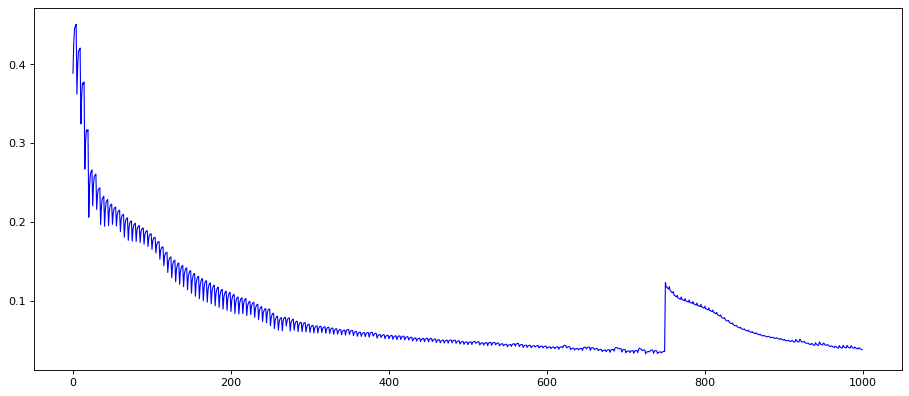

In [188]:
for i in range(3):
    
    print("----------------")
    train(data_healthy_scaled)
    yhat_healthy = score(data_healthy_scaled)
    yhat_broken = score(data_broken_scaled)
    data_healthy_scaled.shape = (3000, 3)
    data_broken_scaled.shape = (3000, 3)


print ("----------------broken")
train(data_broken_scaled)
yhat_healthy = score(data_healthy_scaled)
yhat_broken = score(data_broken_scaled)
data_healthy_scaled.shape = (3000, 3)
data_broken_scaled.shape = (3000, 3)
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
size = len(data_healthy_fft)
#ax.set_ylim(0,energy.max())
ax.plot(range(0,len(losses)), losses, '-', color='blue', animated = True, linewidth=1)

### Anomaly detection using Apache Spark

In [193]:
import findspark
findspark.init()

import pyspark
# sc = pyspark.SparkContext(appName="rdd")

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
    
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession.builder.getOrCreate()

In [190]:

df_healthy = spark.read_csv('result_healthy_pandas.csv')
df_healthy.createOrReplaceTempView('df_healthy')
spark.sql("select _cl, count(_cl) as cn from df_healthy group by _cl order by cn asc")

df_faulty = spark.read_csv('result_faulty_pandas.csv')
df_faulty.createOrReplaceTempView('df_faulty')
spark.sql("select _cl, count(_cl) as cn from df_faulty group by _cl order by cn asc")

AttributeError: 'SparkSession' object has no attribute 'read_csv'

# Time series Forecasting

In [ ]:
## Stateful vs. Stateless LSTM
# Stateful, used when one batch is related to the next (forecasting price): it uses batch 1 last output cell sates as initial states for batch 2
# Stateless, each sequence represents a complete sentence and are not related to the next (NLP) : LSTM updates parameters on batch 1 and then initiates cell states (meaning - memory, usually with zeros) for batch 2    





# Transfer Learning for CNN - classify objects

In [201]:
import tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

102981632/102967424 [==============================] - 37s 0us/step


(224, 224, 3)

In [222]:
img_path = 'image2.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [223]:
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [224]:
preds = model.predict(x)

In [226]:
print('Predicted:', decode_predictions(preds, top=4)[0])

Predicted: [('n03782006', 'monitor', 0.66688114), ('n04152593', 'screen', 0.17322038), ('n03180011', 'desktop_computer', 0.13178262), ('n04404412', 'television', 0.020739071)]


## GANs